Основи TensorFlow та Deep Learning

In [5]:
import tensorflow as tf
import numpy as np

tf_scalar = tf.constant(13)
print("Scalar - ", tf_scalar)

tf_vector = tf.Variable([3, 13, 33.0])
print("Vector - ", tf_vector)

tf_matrix_a = tf.constant([[13, 17],
                        [17, 13]])
print("Matrix a - ", tf_matrix_a)

ar_matrix_b = np.arange(20, 24, dtype=np.int32)
tf_matrix_b = tf.constant(ar_matrix_b, shape=(2, 2))
print("Matrix b - ", tf_matrix_b)

tf_tensor = tf.constant([[[3, 13, 33],
                       [7, 17, 77]],
                      [[9, 19, 99],
                       [4, 14, 44]],
                      [[2, 12, 22],
                       [8, 18, 88]]])
print("Tensor - ", tf_tensor)

# * Операції з тензорами
sum_tensors = tf.add(tf_matrix_a, tf_matrix_b)
print("* Додавання: \n", sum_tensors, "\n")

dif_tensors = tf.subtract(tf_matrix_a, tf_matrix_b)
print("* Віднімання: \n", dif_tensors, "\n")

mul_tensors = tf.multiply(tf_matrix_a, tf_matrix_b)
print("* Множення: \n", mul_tensors, "\n")

div_tensors = tf.divide(tf_matrix_a, tf_matrix_b)
print("* Ділення: \n", div_tensors, "\n")

matrix_product = tf.matmul(tf_matrix_a, tf_matrix_b)
print("* Mатричне множення: \n", matrix_product, "\n")

sum_all_elements = tf.reduce_sum(tf_tensor)
print("* Сумма всіх елементів: \n", sum_all_elements, "\n")

max_value = tf.reduce_max(tf_tensor)
print("* Максимум: \n", max_value, "\n")

min_value = tf.reduce_min(tf_tensor)
print("* Мінімум: \n", min_value, "\n")

element = tf_tensor[2, 0]
print("* Елемент з 3 рядку та 1 колонки:\n ", element, "\n")

sliced_tensor = tf_tensor[:, 1]
print("* Отримати всі елементи з 2-ї колонки: \n", sliced_tensor, "\n")

Scalar -  tf.Tensor(13, shape=(), dtype=int32)
Vector -  <tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([ 3., 13., 33.], dtype=float32)>
Matrix a -  tf.Tensor(
[[13 17]
 [17 13]], shape=(2, 2), dtype=int32)
Matrix b -  tf.Tensor(
[[20 21]
 [22 23]], shape=(2, 2), dtype=int32)
Tensor -  tf.Tensor(
[[[ 3 13 33]
  [ 7 17 77]]

 [[ 9 19 99]
  [ 4 14 44]]

 [[ 2 12 22]
  [ 8 18 88]]], shape=(3, 2, 3), dtype=int32)
* Додавання: 
 tf.Tensor(
[[33 38]
 [39 36]], shape=(2, 2), dtype=int32) 

* Віднімання: 
 tf.Tensor(
[[ -7  -4]
 [ -5 -10]], shape=(2, 2), dtype=int32) 

* Множення: 
 tf.Tensor(
[[260 357]
 [374 299]], shape=(2, 2), dtype=int32) 

* Ділення: 
 tf.Tensor(
[[0.65       0.80952381]
 [0.77272727 0.56521739]], shape=(2, 2), dtype=float64) 

* Mатричне множення: 
 tf.Tensor(
[[634 664]
 [626 656]], shape=(2, 2), dtype=int32) 

* Сумма всіх елементів: 
 tf.Tensor(489, shape=(), dtype=int32) 

* Максимум: 
 tf.Tensor(99, shape=(), dtype=int32) 

* Мінімум: 
 tf.Tensor(2

Втрати навчання (MSE) на навчальних даних: [0.01039416529238224, 0.01039416529238224]
Тестові втрати (MSE) на тестових даних: [0.011929664760828018, 0.011929664760828018]


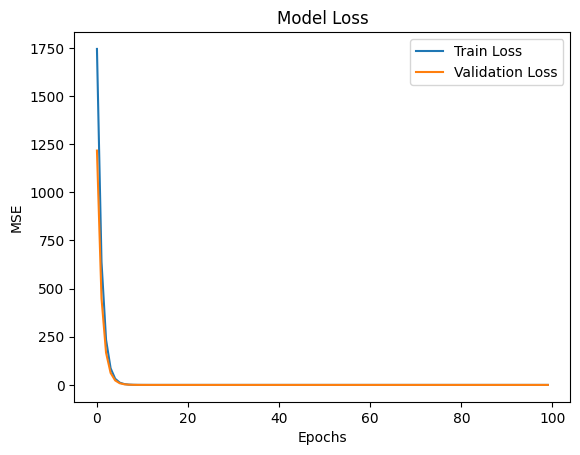

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data1.csv')
X = data.drop('Target', axis=1)
y = data['Target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

model = Sequential([
    Dense(1, input_shape=(X.shape[1],))
])

model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mse'])
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

train_loss = model.evaluate(X_train, y_train, verbose=0)
print("Втрати навчання (MSE) на навчальних даних:", train_loss)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print("Тестові втрати (MSE) на тестових даних:", test_loss)

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Model Loss')
plt.legend()
plt.show()

Втрати навчання (MSE) на навчальних даних: [0.43365517258644104, 0.8237500190734863]
Тестові втрати (MSE) на тестових даних: [0.40535029768943787, 0.8550000190734863]


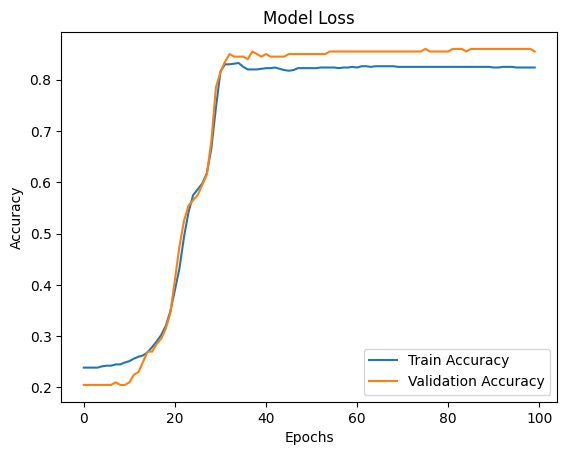

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

import pandas as pd
data = pd.read_csv('data2.csv')
X = data.drop('Target', axis=1)
y = data['Target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

model = Sequential([
    Dense(1, input_shape=(X.shape[1],), activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

train_loss = model.evaluate(X_train, y_train, verbose=0)
print("Втрати навчання (MSE) на навчальних даних:", train_loss)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print("Тестові втрати (MSE) на тестових даних:", test_loss)


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Loss')
plt.legend()
plt.show()